In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('/content/ГПН-НТЦ.xlsx', parse_dates=True, sheet_name='Лист1')#, index_col='DATES')
data.head()

,WELL_ID,DATES,PCOL_TM,PBUF_TM,PZAT_TM,PLIN_TM
0,110009100,2022-02-17 02:43:00,9.25,8.36,8.74,NaN
1,110009100,2022-02-17 02:44:00,8.43,8.38,8.74,NaN
2,110009100,2022-02-17 02:50:00,8.32,8.36,8.53,NaN
3,110009100,2022-02-17 02:55:00,8.34,8.38,8.56,NaN
4,110009100,2022-02-17 03:37:00,8.39,8.38,8.67,NaN


In [ ]:
uniq_field = data.WELL_ID.drop_duplicates()
numeric_col = ['PCOL_TM','PBUF_TM','PZAT_TM', 'PLIN_TM']

In [ ]:
def analyze(field):
  """
  field: pandas.DataFrame object: by ID
  to do: Analyzes the field by the IQR method
  return: pandas.DataFrame object with fillna
  """
  all = {}
  for i in numeric_col:
    all[i] = field[i].describe()

  all = pd.DataFrame(all)

  iqr = [all[i]['75%'] - all[i]['25%'] for i in numeric_col]
  iqr = pd.DataFrame(dict(zip(numeric_col, iqr)), index=['iqr'])
  all = all.append(iqr)

  max_p = [all[i]['75%'] + 1.5*all[i]['iqr'] for i in numeric_col]
  min_p = [all[i]['25%'] - 1.5*all[i]['iqr'] for i in numeric_col]

  max_p = pd.DataFrame(dict(zip(numeric_col, max_p)), index=['max_p'])
  min_p = pd.DataFrame(dict(zip(numeric_col, min_p)), index=['min_p'])

  all = all.append(max_p)
  all = all.append(min_p)

  for i in numeric_col:
    field.loc[field[i] < all[i]['min_p'], i] = np.nan
    field.loc[field[i] > all[i]['max_p'], i] = np.nan

    field.loc[:,i].fillna(method='bfill', inplace=True)

  return field

In [ ]:
df = pd.DataFrame()
for i in uniq_field:
  field = data[data.WELL_ID == i].sort_values(by=['DATES'])
  field = analyze(field)
  df = df.append(field)

df.fillna(method='ffill', inplace=True)

In [ ]:
with pd.ExcelWriter("new.xlsx") as writer:
  df.to_excel(writer, sheet_name="exercise1")  

#plots

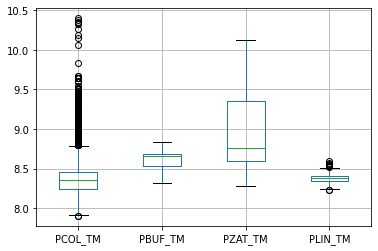

In [ ]:
data[data.WELL_ID == uniq_field.iloc[0]].boxplot(numeric_col)

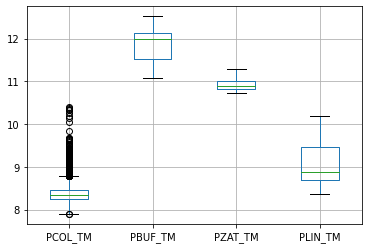

In [ ]:
data[data.WELL_ID == uniq_field.iloc[1]].boxplot(numeric_col)

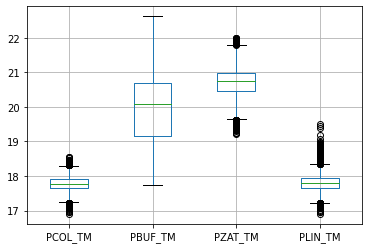

In [ ]:
data[data.WELL_ID == uniq_field.iloc[2]].boxplot(numeric_col)

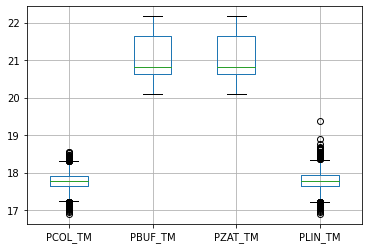

In [ ]:
data[data.WELL_ID == uniq_field.iloc[3]].boxplot(numeric_col)

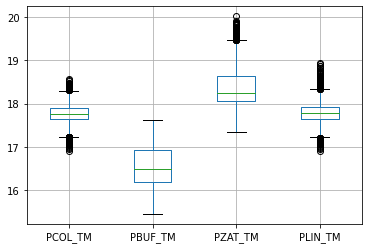

In [ ]:
data[data.WELL_ID == uniq_field.iloc[4]].boxplot(numeric_col)

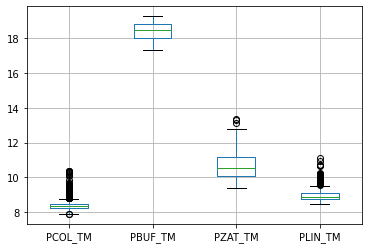

In [ ]:
data[data.WELL_ID == uniq_field.iloc[5]].boxplot(numeric_col)